# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read dataset

In [2]:
df=pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [4]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1067 non-null   float64
 1   CYLINDERS             1067 non-null   int64  
 2   FUELCONSUMPTION_COMB  1067 non-null   float64
 3   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 33.5 KB


In [5]:
cdf.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,11.580881,256.228679
std,1.415895,1.797447,3.485595,63.372304
min,1.000000,3.000000,4.700000,108.000000
25%,2.000000,4.000000,9.000000,207.000000
50%,3.400000,6.000000,10.900000,251.000000
75%,4.300000,8.000000,13.350000,294.000000
max,8.400000,12.000000,25.800000,488.000000


#     Data Analysis

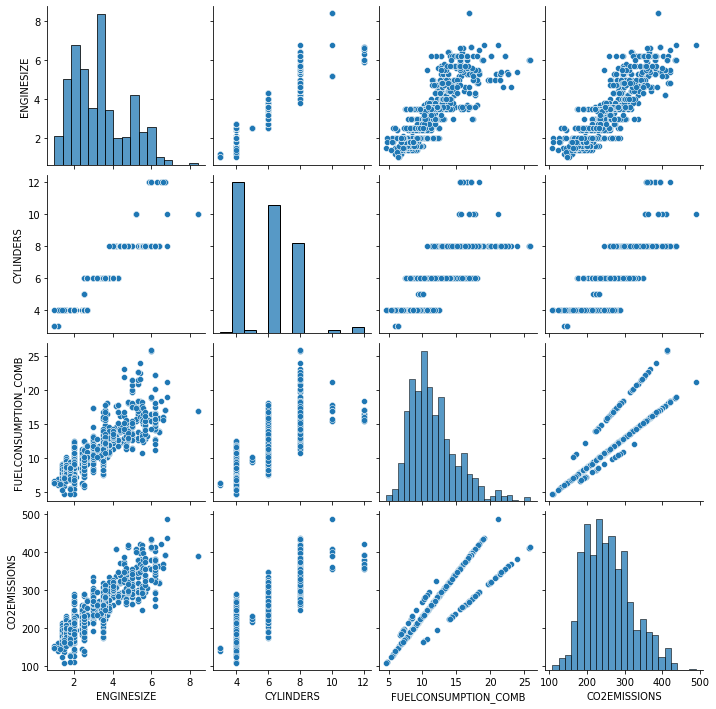

In [6]:
sns.pairplot(cdf)

<AxesSubplot:>

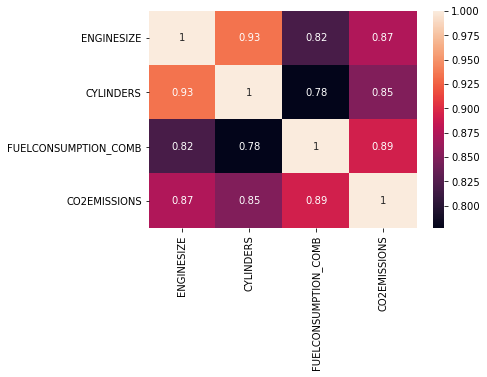

In [7]:
sns.heatmap(cdf.corr(),annot=True)

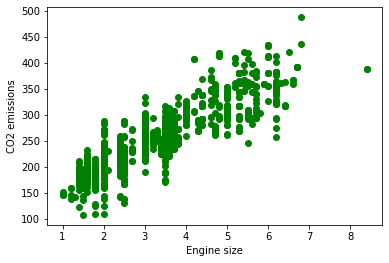

In [8]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='green')
plt.xlabel('Engine size')
plt.ylabel('CO2 emissions')
plt.show()

# Train test split

In [9]:
X=cdf[['ENGINESIZE']]
y=cdf[['CO2EMISSIONS']]


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

# Import polynomial features to make multiple regressions

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(X_train)
train_x_poly

array([[ 1.  ,  3.6 , 12.96],
       [ 1.  ,  1.6 ,  2.56],
       [ 1.  ,  3.6 , 12.96],
       ...,
       [ 1.  ,  6.8 , 46.24],
       [ 1.  ,  3.6 , 12.96],
       [ 1.  ,  4.  , 16.  ]])

# Now do final thing

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm=LinearRegression()

In [16]:
train_y_=lm.fit(train_x_poly,y_train)

In [17]:
print("Coefficient:\n",lm.coef_,"\nIntercept:\n",lm.intercept_)

Coefficient:
 [[ 0.         50.89634427 -1.54073059]] 
Intercept:
 [106.49980213]


Text(0, 0.5, 'Emission')

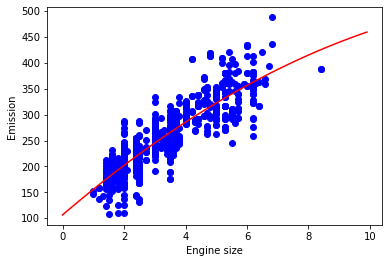

In [20]:
plt.scatter(X_train,y_train,color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = lm.intercept_[0]+ lm.coef_[0][1]*XX+ lm.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

# Evaluation

In [26]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(X_test)
test_y_ = lm.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test,test_y_ ) )

Mean absolute error: 23.49
Residual sum of squares (MSE): 900.09
R2-score: 0.77
